##ID Card Tampering Detection

The purpose of this project is to detect tampering of New York State ID cards using computer vision. 

This project will help different organizations in detecting whether the id provided by them by their employees or customers is original or not. 

In order to do so we will be calculating the structural similarity of an original ID card and the ID card provided by a employee. In this case, I used an adult driver's license example versus a minor's driver's license. 

In [1]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [2]:
!mkdir id_card_tampering
!mkdir id_card_tampering/image

mkdir: cannot create directory ‘id_card_tampering’: File exists
mkdir: cannot create directory ‘id_card_tampering/image’: File exists


In [3]:
#open the image and display
original = Image.open(requests.get('https://dmv.ny.gov/sites/default/files/styles/panopoly_image_original/public/thumbnail_image002_0.jpg?itok=32kiqMAM', stream=True).raw)
tampered = Image.open(requests.get('https://dmv.ny.gov/sites/default/files/styles/panopoly_image_original/public/thumbnail_image003.jpg?itok=uReUq0E1', stream=True).raw)

In [4]:
# The file format of the source file.
print("Original image format : ",original.format) 
print("Tampered image format : ",tampered.format)

# Image size, in pixels. The size is given as a 2-tuple (width, height).
print("Original image size : ",original.size) 
print("Tampered image size : ",tampered.size) 

Original image format :  JPEG
Tampered image format :  JPEG
Original image size :  (779, 510)
Tampered image size :  (510, 779)


In [5]:
#Resize image
original = original.resize((250, 160))
print(original.size)
original.save('id_card_tampering/image/original.jpeg')
tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save('id_card_tampering/image/tampered.jpeg')

(250, 160)
(250, 160)


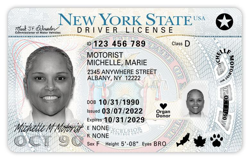

In [6]:
#display original image
original

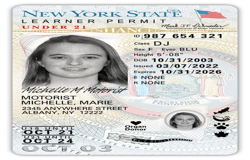

In [7]:
#display tampered image
tampered

In [10]:
#load the two imput images
original = cv2.imread('/content/id_card_tampering/image/original.jpeg')
tampered = cv2.imread('/content/id_card_tampering/image/tampered.jpeg')

In [11]:
#convert the images to grayscale
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

Converting the images into grayscale using opencv. Because in image processing many applications don't help us in identifying the important edges of the colored images. Additionally, colored images are complex to understand by machines due to them composing of 3 channels while grayscale has only 1 channel.

In [12]:
# Compute the Structural Similarity Index (SSIM) between the two images, ensuring that the difference image is returned
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.09253007465103653


Structural similarity index helps us determine exactly where in terms of x,y coordinates location, the image differences are. Here, we are trying to find the similarities between the original and tampered image. The lower the SSIM score the lower the similarity. 

In this case the high SSIM score detects both ID types are very similar. 

In [13]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

Above we are using the threshold function of computer vision which applies an adaptive threshold to the image which is stored in the form of an array. This function transforms the grayscale image into a binary image using a mathematical formula.

Finding countours works on binary images and retrieves their contours. This countours are a useful tool for shape analysis and recognition. Grabbing the contours grabs the appropriate values of said contours.

In [14]:
#loop over the contours
for c in cnts:
    #applying contours on image
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)

Bounding rectangles helps in finding the ratio of width to heigh of bounding rectangles on the object. We compute the bounding box of the countour and then draw the bounding box on both input images to represent where the 2 images are different or not.

Original Format Image


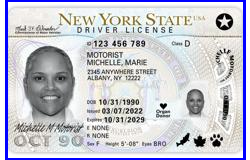

In [15]:
#Diplay original image with contour
print('Original Format Image')
Image.fromarray(original)

Tampered Image


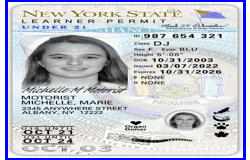

In [16]:
#Diplay tampered image with contour
print('Tampered Image')
Image.fromarray(tampered)

Different Image


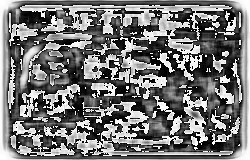

In [17]:
#Diplay difference image with black
print('Different Image')
Image.fromarray(diff)

Threshold Image


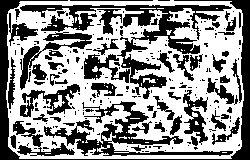

In [18]:
#Display threshold image with white
print('Threshold Image')
Image.fromarray(thresh)

#Summary

Finding out structual similarity of the images helped us in finding the difference or similarity in the shape of the images. Similarly, finding out the threshold and contours based on those threhold for the images converted into grayscale binary also helped us in shape analysis and recognition.

As our SSIM of ~93% we can say the the image user provided may be real and has a slim chance of being fake or tampered with.

Finally, we visualized the differences and similarities between the images by displaying the images with contours, difference and threshold. 